In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv


2020-10-22 11:11:39 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [5]:
df=pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


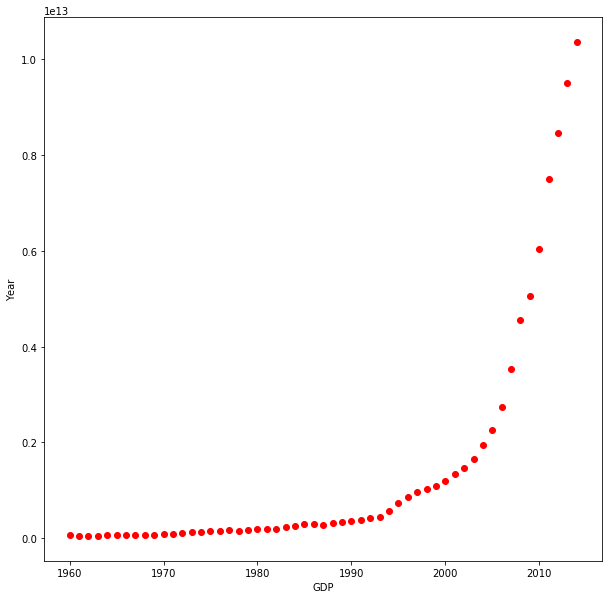

In [45]:
plt.figure(figsize=(10,10))
x_data,y_data=(df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,"ro")
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

In [55]:
def sigmoid(x,o1,o2):
    y=1/(1+np.exp(-(x*o1)+o2))
    return y


In [59]:
x_data.shape

(55,)

In [56]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [60]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,xdata,ydata)
print("o1= %f ,o2= %f"%(popt[0],popt[1]))
pcov

o1= 690.360233 ,o2= 688.432136


array([[1531.05845049, 1526.58271062],
       [1526.58271062, 1522.12348901]])

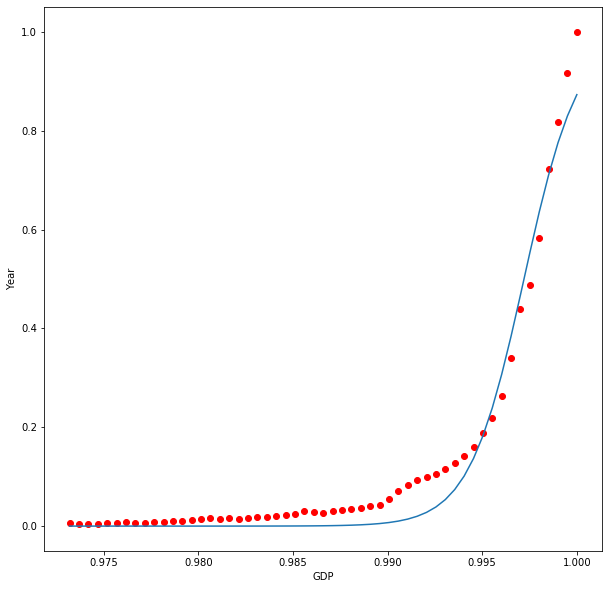

In [61]:
plt.figure(figsize=(10,10))

plt.plot(xdata,ydata,"ro")
plt.plot(xdata,sigmoid(xdata,*popt))
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

0.9728046866161807

In [67]:
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.98
